# Аппроксимация функции

## Задание:

Найти функцию, являющуюся наилучшим приближением заданной табличной функции по методу наименьших квадратов.

## Рабочие формулы

### Линейная функция

$$a = \frac{\sum (x_i  y_i) n - \sum (x_i) \sum (y_i)}{\sum (x_i x_i) n - \sum (x_i) \sum (x_i)}$$

$$b = \frac{\sum (x_i  x_i) \sum (y_i) - \sum (x_i) \sum (x_i y_i)}{\sum (x_i x_i) n - \sum (x_i) \sum (x_i)} $$

### Квадратичная функция

$$ \begin{cases}
a_0 n + a_1 \sum x_i + a_2 \sum x_i^2 = \sum y_i \\
a_0 \sum x_i + a_1 \sum x_i^2 + a_2 \sum x_i^3 = \sum x_i y_i \\
a_0 \sum x_i^2 + a_1 \sum x_i^3 + a_2 \sum x_i^4 = \sum x_i^2 y_i
\end{cases}$$

Или в матричном виде: 

$$ \begin{vmatrix}
n & \sum x_i & \sum x_i^2 \\
\sum x_i & \sum x_i^2 & \sum x_i^3 \\
\sum x_i^2 & \sum x_i^3 & \sum x_i^4 \\
\end{vmatrix} * \begin{vmatrix} a_0 \\ a_1 \\ a_2 \end{vmatrix} = \begin{vmatrix} \sum y_i \\ \sum x_i y_i \\ \sum x_i^2 y_i \end{vmatrix}$$

### Степенная функция

$ f(x) = ax^b $

Линеанизированная функция: $ ln(f(x)) = ln(ax^b) = ln(a) + b ln(x)$

Введем обозначения: $ y = ln(f(x)); a = ln(a); b=b; x = ln(x) $ 

Получаем линейную зависимость: $ y=a+bx $. После определения коэффициентов a и b вернемся к принятым ранее обозначениям: $a = e^a$

### Экспоненициальная функция

$ f(x) = a e^{bx} $

Линеанизированная функция: $ ln(f(x)) = ln(a e^{bx}) = ln(a) + b x$

Введем обозначения: $ y = ln(f(x)); a = ln(a); b=b $

Получаем линейную зависимость: $ y=a+bx $. После определения коэффициентов a и b вернемся к принятым ранее обозначениям: $a = e^a$

### Логарифмическая функция

$ f(x) = a + b ln(x) $

Введем обозначения: $ x = ln(x); a = ln(a); b=b $

### Мера отклонения

$ S = \sum \varepsilon_i $

### Среднеквадратичное отклонение

$ \varsigma = \sqrt { \frac {\sum (f(x_i) - y_i)^2}{n}} $

In [1]:
import numpy as np 
import math
import matplotlib.pyplot as plt
import csv
import io

In [2]:
def draw(f, a, b, c):
    plt.figure(figsize=(8, 4))
    plt.plot(x, y, 'ro')
    y2 = f(x, a, b, c)
    plt.plot(x, y2)
    plt.grid()
    plt.show()

#### Формат записи данных в файл `input.txt`:

строка 1: массив координат Х через пробел

строка 2: массив координат Y через пробел

Линейная функция: f(x) = 0.5380952380952376 x + 0.7921611721611743
Мера отклонения: S = 0.7289912087912089
Среднеквадратичное отклонение: s = 0.23680423735670988



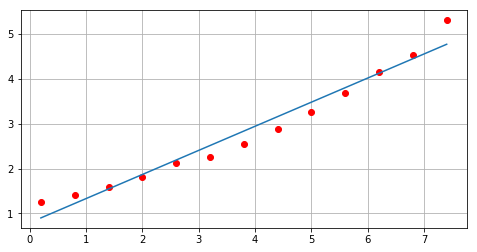

Квадратичная функция: f(x) = 0.051032301032301615 x^2 + 0.15024975024974543 x + 1.2718648018648089
Мера отклонения: S = 0.053282717282717135
Среднеквадратичное отклонение: s = 0.06402086035199005



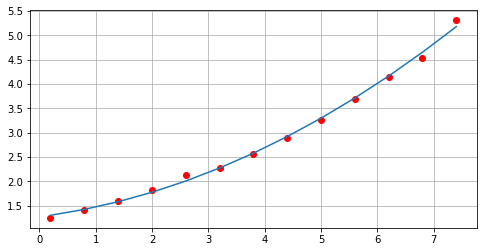

Экспоненциальная: f(x) = 1.215703865782892 e ^ (0.19763787606129538 x)
Мера отклонения: S = 0.02986840067371598
Среднеквадратичное отклонение: s = 0.04793296655323491



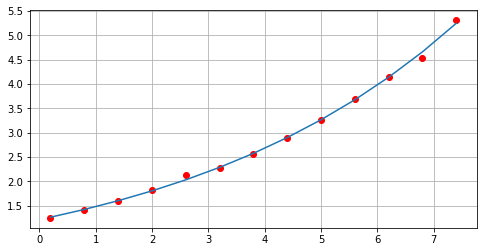

Степенная функция: f(x) = 1.7044373788436442 x ^ 0.4066229321025772
Мера отклонения: S = 4.245430837077175
Среднеквадратичное отклонение: s = 0.5714644370843127



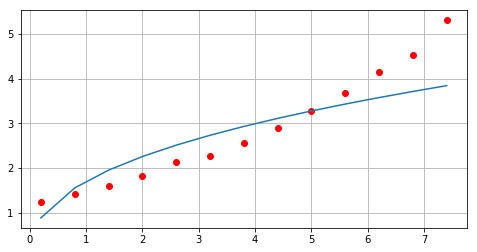

Логарифмичекая функция: f(x) = 1.0215797719860982 ln(x) + 1.799040288154536
Мера отклонения: S = 6.522715511584327
Среднеквадратичное отклонение: s = 0.708341264536345



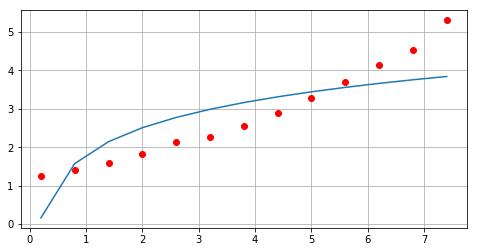













 Наилучшая аппроксимирующая функция...
 Экспоненциальная: f(x) = 1.215703865782892 e ^ (0.19763787606129538 x) 













Сохранить результат в файл? (y, n)
y


In [80]:
content = []
with open("input.txt") as f:
    for line in f:
        content.append([float(x) for x in line.split(" ")])
f.close()

x = np.array(content[0])
y = np.array(content[1])
c = 0

def f(x, a, b, c):
    return a*x + b
a, b = linear_function(x, y)
s = standard_deviation(f, a, b, 0)
print(f'Линейная функция: f(x) = {a} x + {b}')
print(f'Мера отклонения: S = {deviation_f(f, a, b, 0)}')
print(f'Среднеквадратичное отклонение: s = {s}\n')
draw(f, a, b, 0)

ans = []
best_s = s
ans.append({"type": 0, "a": a,"b": b,"c": c,"S": deviation_f(f, a, b, c),"s": s}) 

str_ans = f'Линейная функция: f(x) = {a} x + {b}'

def f1(x, a, b, c):
    return a*x*x + b*x + c
c, b, a = quadratic_function(x, y)
s = standard_deviation(f1, a, b, c)
print(f'Квадратичная функция: f(x) = {a} x^2 + {b} x + {c}')
print(f'Мера отклонения: S = {deviation_f(f1, a, b, c)}')
print(f'Среднеквадратичное отклонение: s = {s}\n')
draw(f1, a, b, c)

ans.append({"type": 1, "a": a,"b": b,"c": c,"S": deviation_f(f1, a, b, c),"s": s}) 

if (s < best_s):
    best_s = s
    str_ans = f'Квадратичная функция: f(x) = {a} x^2 + {b} x + {c}'

def f2(x, a, b, c):
    return a*pow(math.exp(1), b*x)
a, b = exponential_function(x, y)
s = standard_deviation(f2, a, b, c)
print(f'Экспоненциальная: f(x) = {a} e ^ ({b} x)')
print(f'Мера отклонения: S = {deviation_f(f2, a, b, 0)}')
print(f'Среднеквадратичное отклонение: s = {s}\n')
draw(f2, a, b, c)

ans.append({"type":2, "a": a,"b": b,"c": c,"S": deviation_f(f2, a, b, c),"s": s}) 

if (s < best_s):
    best_s = s
    str_ans = f'Экспоненциальная: f(x) = {a} e ^ ({b} x)'

def f3(x, a, b, c):
    return a*pow(x, b)
a, b = power_function(x, y)
s = standard_deviation(f3, a, b, c)
print(f'Степенная функция: f(x) = {a} x ^ {b}')
print(f'Мера отклонения: S = {deviation_f(f3, a, b, 0)}')
print(f'Среднеквадратичное отклонение: s = {s}\n')
draw(f3, a, b, c)

ans.append({"type":3, "a": a,"b": b,"c": c,"S": deviation_f(f3, a, b, c),"s": s}) 

if (s < best_s):
    best_s = s
    str_ans = f'Степенная функция: f(x) = {a} x ^ {b}'

def f4(x, a, b, c):
    return  a * math.log(x, math.exp(1)) + b
def f4_1(x, a, b, c):
    res = np.array([])
    for i in x:
         res = np.append(res, a * math.log(i, math.exp(1)) + b)
    return res
a, b = logarithmic_function(x, y)
s = standard_deviation(f4, a, b, c)
print(f'Логарифмичекая функция: f(x) = {a} ln(x) + {b}')
print(f'Мера отклонения: S = {deviation_f(f4, a, b, 0)}')
print(f'Среднеквадратичное отклонение: s = {s}\n')
draw(f4_1, a, b, c)

ans.append({"type":4, "a": a,"b": b,"c": c,"S": deviation_f(f4, a, b, c),"s": s}) 

if (s < best_s):
    best_s = s
    str_ans = f'Логарифмичекая функция: f(x) = {a} ln(x) + {b}'

print("\n\n\n\n\n\n\n\n\n\n\n")    
print(' Наилучшая аппроксимирующая функция...\n', str_ans, "\n")
print("\n\n\n\n\n\n\n\n\n\n\n")

inp = ""
while (inp != 'y' and inp != 'n'):
    print(f'Сохранить результат в файл? (y, n)')
    inp = str(input())
    if (inp == "y"):
        out = open('out.txt', 'w')
        out.write("_________________________________________________________________________________________________________________________________\n" +
                  "|  Вид функции  |     Линейная      |    Полиномиальная    |    Экспоненциальная    |      Степенная        |  Логарифмическая   |\n" +
                  "|_______________|___________________|______________________|________________________|_______________________|____________________|\n" +
                  "|   X   |   Y   | y = %.2fx + %.2f  | y=%.2fx^2+%.2fx+%.2f |  y = %.2f * e^(%.2fx)  |   y = %.2f * x^%.2f   | y=%.2f + %.2fln(x) |\n" % (ans[0].get('a'), ans[0].get('b'), ans[1].get('a'), ans[1].get('b'), ans[1].get('c'), ans[2].get('a'), ans[2].get('b'), ans[3].get('a'), ans[3].get('b'), ans[4].get('a'), ans[4].get('b')) +
                  "|_______|_______|___________________|______________________|________________________|_______________________|____________________|\n" +
                 f'|  {x[0]}  |  {y[0]} |' + "       %.4f      |"%f(x[0], ans[0].get("a"), ans[0].get("b"), 0) + "        %.4f        |" % f1(x[0], ans[1].get("a"), ans[1].get("b"), ans[1].get("c")) + "         %.4f         |"%(f2(x[0], ans[2].get("a"), ans[2].get("b"), 0)) + "         %.4f        |"%(f3(x[0], ans[3].get("a"), ans[3].get("b"), 0)) +  "       %.4f       |"%(f4(x[0], ans[4].get("a"), ans[4].get("b"), 0)) +"\n"+ 
                  "|_______|_______|___________________|______________________|________________________|_______________________|____________________|\n" +
                 f'|  {x[1]}  |  {y[1]} |' + "       %.4f      |"%f(x[1], ans[0].get("a"), ans[0].get("b"), 0) + "        %.4f        |" % f1(x[1], ans[1].get("a"), ans[1].get("b"), ans[1].get("c")) + "         %.4f         |"%(f2(x[1], ans[2].get("a"), ans[2].get("b"), 0)) + "         %.4f        |"%(f3(x[1], ans[3].get("a"), ans[3].get("b"), 0)) +  "       %.4f       |"%(f4(x[1], ans[4].get("a"), ans[4].get("b"), 0)) +"\n"+ 
                  "|_______|_______|___________________|______________________|________________________|_______________________|____________________|\n" +
                 f'|  {x[2]}  |  {y[2]} |' + "       %.4f      |"%f(x[2], ans[0].get("a"), ans[0].get("b"), 0) + "        %.4f        |" % f1(x[2], ans[1].get("a"), ans[1].get("b"), ans[1].get("c")) + "         %.4f         |"%(f2(x[2], ans[2].get("a"), ans[2].get("b"), 0)) + "         %.4f        |"%(f3(x[2], ans[3].get("a"), ans[3].get("b"), 0)) +  "       %.4f       |"%(f4(x[2], ans[4].get("a"), ans[4].get("b"), 0)) +"\n"+ 
                  "|_______|_______|___________________|______________________|________________________|_______________________|____________________|\n" +
                 f'|  {x[3]}  |  {y[3]} |' + "       %.4f      |"%f(x[3], ans[0].get("a"), ans[0].get("b"), 0) + "        %.4f        |" % f1(x[3], ans[1].get("a"), ans[1].get("b"), ans[1].get("c")) + "         %.4f         |"%(f2(x[3], ans[2].get("a"), ans[2].get("b"), 0)) + "         %.4f        |"%(f3(x[3], ans[3].get("a"), ans[3].get("b"), 0)) +  "       %.4f       |"%(f4(x[3], ans[4].get("a"), ans[4].get("b"), 0)) +"\n"+ 
                  "|_______|_______|___________________|______________________|________________________|_______________________|____________________|\n" +
                 f'|  {x[4]}  |  {y[4]} |' + "       %.4f      |"%f(x[4], ans[0].get("a"), ans[0].get("b"), 0) + "        %.4f        |" % f1(x[4], ans[1].get("a"), ans[1].get("b"), ans[1].get("c")) + "         %.4f         |"%(f2(x[4], ans[2].get("a"), ans[2].get("b"), 0)) + "         %.4f        |"%(f3(x[4], ans[3].get("a"), ans[3].get("b"), 0)) +  "       %.4f       |"%(f4(x[4], ans[4].get("a"), ans[4].get("b"), 0)) +"\n"+ 
                  "|_______|_______|___________________|______________________|________________________|_______________________|____________________|\n" +
                 f'|  {x[5]}  |  {y[5]} |' + "       %.4f      |"%f(x[5], ans[0].get("a"), ans[0].get("b"), 0) + "        %.4f        |" % f1(x[5], ans[1].get("a"), ans[1].get("b"), ans[1].get("c")) + "         %.4f         |"%(f2(x[5], ans[2].get("a"), ans[2].get("b"), 0)) + "         %.4f        |"%(f3(x[5], ans[3].get("a"), ans[3].get("b"), 0)) +  "       %.4f       |"%(f4(x[5], ans[4].get("a"), ans[4].get("b"), 0)) +"\n"+ 
                  "|_______|_______|___________________|______________________|________________________|_______________________|____________________|\n" +
                 f'|  {x[6]}  |  {y[6]} |' + "       %.4f      |"%f(x[6], ans[0].get("a"), ans[0].get("b"), 0) + "        %.4f        |" % f1(x[6], ans[1].get("a"), ans[1].get("b"), ans[1].get("c")) + "         %.4f         |"%(f2(x[6], ans[2].get("a"), ans[2].get("b"), 0)) + "         %.4f        |"%(f3(x[6], ans[3].get("a"), ans[3].get("b"), 0)) +  "       %.4f       |"%(f4(x[6], ans[4].get("a"), ans[4].get("b"), 0)) +"\n"+ 
                  "|_______|_______|___________________|______________________|________________________|_______________________|____________________|\n" +
                 f'|  {x[7]}  |  {y[7]} |' + "       %.4f      |"%f(x[7], ans[0].get("a"), ans[0].get("b"), 0) + "        %.4f        |" % f1(x[7], ans[1].get("a"), ans[1].get("b"), ans[1].get("c")) + "         %.4f         |"%(f2(x[7], ans[2].get("a"), ans[2].get("b"), 0)) + "         %.4f        |"%(f3(x[7], ans[3].get("a"), ans[3].get("b"), 0)) +  "       %.4f       |"%(f4(x[7], ans[4].get("a"), ans[4].get("b"), 0)) +"\n"+ 
                  "|_______|_______|___________________|______________________|________________________|_______________________|____________________|\n" +
                 f'|  {x[8]}  |  {y[8]} |' + "       %.4f      |"%f(x[8], ans[0].get("a"), ans[0].get("b"), 0) + "        %.4f        |" % f1(x[8], ans[1].get("a"), ans[1].get("b"), ans[1].get("c")) + "         %.4f         |"%(f2(x[8], ans[2].get("a"), ans[2].get("b"), 0)) + "         %.4f        |"%(f3(x[8], ans[3].get("a"), ans[3].get("b"), 0)) +  "       %.4f       |"%(f4(x[8], ans[4].get("a"), ans[4].get("b"), 0)) +"\n"+ 
                  "|_______|_______|___________________|______________________|________________________|_______________________|____________________|\n" +
                 f'|  {x[9]}  |  {y[9]} |' + "       %.4f      |"%f(x[9], ans[0].get("a"), ans[0].get("b"), 0) + "        %.4f        |" % f1(x[9], ans[1].get("a"), ans[1].get("b"), ans[1].get("c")) + "         %.4f         |"%(f2(x[9], ans[2].get("a"), ans[2].get("b"), 0)) + "         %.4f        |"%(f3(x[9], ans[3].get("a"), ans[3].get("b"), 0)) +  "       %.4f       |"%(f4(x[9], ans[4].get("a"), ans[4].get("b"), 0)) +"\n"+ 
                  "|_______|_______|___________________|______________________|________________________|_______________________|____________________|\n" +
                 f'|  {x[10]}  |  {y[10]} |' + "       %.4f      |"%f(x[10], ans[0].get("a"), ans[0].get("b"), 0) + "        %.4f        |" % f1(x[10], ans[1].get("a"), ans[1].get("b"), ans[1].get("c")) + "         %.4f         |"%(f2(x[10], ans[2].get("a"), ans[2].get("b"), 0)) + "         %.4f        |"%(f3(x[10], ans[3].get("a"), ans[3].get("b"), 0)) +  "       %.4f       |"%(f4(x[10], ans[4].get("a"), ans[4].get("b"), 0)) +"\n"+ 
                  "|_______|_______|___________________|______________________|________________________|_______________________|____________________|\n" +
                 f'|  {x[11]}  |  {y[11]} |' + "       %.4f      |"%f(x[11], ans[0].get("a"), ans[0].get("b"), 0) + "        %.4f        |" % f1(x[11], ans[1].get("a"), ans[1].get("b"), ans[1].get("c")) + "         %.4f         |"%(f2(x[11], ans[2].get("a"), ans[2].get("b"), 0)) + "         %.4f        |"%(f3(x[11], ans[3].get("a"), ans[3].get("b"), 0)) +  "       %.4f       |"%(f4(x[11], ans[4].get("a"), ans[4].get("b"), 0)) +"\n"+ 
                  "|_______|_______|___________________|______________________|________________________|_______________________|____________________|\n" +
                 f'|  {x[12]}  |  {y[12]} |' + "       %.4f      |"%f(x[12], ans[0].get("a"), ans[0].get("b"), 0) + "        %.4f        |" % f1(x[12], ans[1].get("a"), ans[1].get("b"), ans[1].get("c")) + "         %.4f         |"%(f2(x[12], ans[2].get("a"), ans[2].get("b"), 0)) + "         %.4f        |"%(f3(x[12], ans[3].get("a"), ans[3].get("b"), 0)) +  "       %.4f       |"%(f4(x[12], ans[4].get("a"), ans[4].get("b"), 0)) +"\n"+ 
                  "|_______|_______|___________________|______________________|________________________|_______________________|____________________|\n" +
                  "")

In [3]:
def linear_function(x, y):
    a = (np.sum(x*y)*len(x)-np.sum(x)*np.sum(y))/(np.sum(x*x)*len(x)-np.sum(x)*np.sum(x))
    b = (np.sum(x*x)*np.sum(y)-np.sum(x)*np.sum(x*y))/(np.sum(x*x)*len(x)-np.sum(x)*np.sum(x))
    return [a, b]

# возвращает c, b, a
def quadratic_function(x, y):
    matrix_left = np.array([[len(x), np.sum(x), np.sum(x*x)], [np.sum(x), np.sum(x*x), np.sum(x*x*x)], [np.sum(x*x), np.sum(x*x*x), np.sum(x*x*x*x)]])
    matrix_right = np.array([np.sum(y), np.sum(y*x), np.sum(y*x*x)])
    return np.linalg.solve(matrix_left, matrix_right)

def exponential_function(x, y):
    lny = np.array([])
    for i in y:
        lny = np.append(lny, [math.log(i, math.exp(1))])
    b, a = linear_function(x, lny)
    a = math.exp(a)
    return [a, b]

def power_function(x, y):
    lny = np.array([])
    for i in y:
        lny = np.append(lny, [math.log(i, math.exp(1))])
    lnx = np.array([])
    for i in x:
        lnx = np.append(lnx, [math.log(i, math.exp(1))])
    b, a = linear_function(lnx, lny)
    a = np.exp(a)
    return [a, b]

def logarithmic_function(x, y):
    lnx = np.array([])
    for i in x:
        lnx = np.append(lnx, [math.log(i, math.exp(1))])
    b, a = linear_function(lnx, y)
    return [b, a]

In [4]:
def deviation_f(f, a, b, c):
    eps = np.array([])
    for i in range(0, len(x)):
        eps = np.append(eps, (y[i] - f(x[i], a, b, c)))
    return np.sum(eps*eps)

def standard_deviation(f, a, b, c):
    res = 0
    for i in range(0, len(x)):
        res = res + pow(y[i] - f(x[i], a, b, c), 2)
    return math.sqrt(res/len(x))